In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [151]:
focal_adhesion = pd.read_csv("Book3.csv")

In [152]:
focal_adhesion

,Unnamed: 0,X7791_at,X1398_at,X1284_at,X3675_at,X1282_at,X7424_at,X5159_at,X2321_at,X2324_at,...,X5154_at,X5155_at,X2885_at,X595_at,X5295_at,X329_at,Disease,ID,Disease2,Nephrotic
0,1,6.616270,6.650780,6.212293,10.158111,6.542626,5.965278,7.573721,7.400331,5.616704,...,6.348953,4.910223,7.497142,8.763867,7.074309,6.254792,Glomerular,94,MN,1
1,2,7.001047,6.386364,5.273056,9.860777,5.513112,6.616980,7.162280,7.310031,5.399082,...,6.681751,3.884280,7.154931,8.360980,7.308968,6.084218,Glomerular,81,FSGS,1
2,3,6.628755,6.500360,5.677885,9.879791,6.278609,5.795266,6.059988,6.407779,5.094513,...,6.078079,3.860516,6.942900,8.557394,7.141224,6.306339,Glomerular,133,MN,1
3,4,6.984691,6.581776,5.951040,10.673389,6.115012,5.129073,7.756084,8.035208,6.034542,...,6.683461,4.298766,7.325002,8.815787,6.927415,5.868231,Glomerular,102,MN,1
4,5,6.714409,6.629443,6.151001,9.715433,6.422950,6.330880,7.072725,7.855886,5.818230,...,6.026231,4.631380,7.271276,8.059317,7.563310,6.236375,Glomerular,82,FSGS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,6.309457,7.084534,7.136771,10.760538,7.820753,5.256161,8.533344,9.839728,6.076459,...,6.335928,4.546304,6.953539,8.814828,7.700050,6.514003,Glomerular,6,MCD,1
103,104,6.114081,6.623781,5.492398,11.019819,5.803733,5.727388,7.747092,7.482525,5.762355,...,7.402658,4.970225,7.273947,8.238052,7.469386,6.369455,Glomerular,567,MN,1
104,105,7.300323,6.930577,5.488512,10.677016,5.486495,5.454204,8.471081,8.962164,7.130242,...,6.373126,4.488608,7.072283,8.853904,6.795654,6.349480,Glomerular,571,MN,1
105,106,7.256771,6.936422,6.429368,10.618888,6.479440,4.949829,7.867039,8.490338,5.354927,...,6.312014,4.003970,6.713200,7.473833,7.772563,5.519994,Glomerular,569,MN,1


In [153]:
focal_adhesion.dtypes

Unnamed: 0      int64
X7791_at      float64
X1398_at      float64
X1284_at      float64
X3675_at      float64
X1282_at      float64
X7424_at      float64
X5159_at      float64
X2321_at      float64
X2324_at      float64
X23396_at     float64
X81_at        float64
X7094_at      float64
X2316_at      float64
X5829_at      float64
X3611_at      float64
X8503_at      float64
X7410_at      float64
X2889_at      float64
X3678_at      float64
X5154_at      float64
X5155_at      float64
X2885_at      float64
X595_at       float64
X5295_at      float64
X329_at       float64
Disease        object
ID              int64
Disease2       object
Nephrotic       int64
dtype: object

In [154]:
focal_adhesion['Nephrotic'] = focal_adhesion['Nephrotic'].astype(str).astype(object)
focal_adhesion.dtypes

Unnamed: 0      int64
X7791_at      float64
X1398_at      float64
X1284_at      float64
X3675_at      float64
X1282_at      float64
X7424_at      float64
X5159_at      float64
X2321_at      float64
X2324_at      float64
X23396_at     float64
X81_at        float64
X7094_at      float64
X2316_at      float64
X5829_at      float64
X3611_at      float64
X8503_at      float64
X7410_at      float64
X2889_at      float64
X3678_at      float64
X5154_at      float64
X5155_at      float64
X2885_at      float64
X595_at       float64
X5295_at      float64
X329_at       float64
Disease        object
ID              int64
Disease2       object
Nephrotic      object
dtype: object

In [155]:
import random
random.seed(123)

In [156]:
focal_adhesion.columns

Index(['Unnamed: 0', 'X7791_at', 'X1398_at', 'X1284_at', 'X3675_at',
       'X1282_at', 'X7424_at', 'X5159_at', 'X2321_at', 'X2324_at', 'X23396_at',
       'X81_at', 'X7094_at', 'X2316_at', 'X5829_at', 'X3611_at', 'X8503_at',
       'X7410_at', 'X2889_at', 'X3678_at', 'X5154_at', 'X5155_at', 'X2885_at',
       'X595_at', 'X5295_at', 'X329_at', 'Disease', 'ID', 'Disease2',
       'Nephrotic'],
      dtype='object')

In [157]:
genename = focal_adhesion.rename(columns = {'X7791_at':'ZYX', 'X1398_at':'CRK', 'X1284_at':'COL4A2', 'X3675_at':'ITGA3',
       'X1282_at':'COL4A1', 'X7424_at':'VEGFC', 'X5159_at':'PDGFRB', 'X2321_at':'FLT1', 'X2324_at':'FLT4', 'X23396_at':'PIP5K1C',
       'X81_at':'ACTN4', 'X7094_at':'TLN1', 'X2316_at':'FLNA', 'X5829_at':'PXN', 'X3611_at':'ILK', 'X8503_at':'PIK3R3',
       'X7410_at':'VAV2', 'X2889_at':'RAPGEF1', 'X3678_at':'ITGA5', 'X5154_at':'PDGFA', 'X5155_at':'PDGFB', 'X2885_at':'GRB2',
       'X595_at':'CCND1', 'X5295_at':'PIK3R1', 'X329_at':'BIRC2'})

In [158]:
genename

,Unnamed: 0,ZYX,CRK,COL4A2,ITGA3,COL4A1,VEGFC,PDGFRB,FLT1,FLT4,...,PDGFA,PDGFB,GRB2,CCND1,PIK3R1,BIRC2,Disease,ID,Disease2,Nephrotic
0,1,6.616270,6.650780,6.212293,10.158111,6.542626,5.965278,7.573721,7.400331,5.616704,...,6.348953,4.910223,7.497142,8.763867,7.074309,6.254792,Glomerular,94,MN,1
1,2,7.001047,6.386364,5.273056,9.860777,5.513112,6.616980,7.162280,7.310031,5.399082,...,6.681751,3.884280,7.154931,8.360980,7.308968,6.084218,Glomerular,81,FSGS,1
2,3,6.628755,6.500360,5.677885,9.879791,6.278609,5.795266,6.059988,6.407779,5.094513,...,6.078079,3.860516,6.942900,8.557394,7.141224,6.306339,Glomerular,133,MN,1
3,4,6.984691,6.581776,5.951040,10.673389,6.115012,5.129073,7.756084,8.035208,6.034542,...,6.683461,4.298766,7.325002,8.815787,6.927415,5.868231,Glomerular,102,MN,1
4,5,6.714409,6.629443,6.151001,9.715433,6.422950,6.330880,7.072725,7.855886,5.818230,...,6.026231,4.631380,7.271276,8.059317,7.563310,6.236375,Glomerular,82,FSGS,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,103,6.309457,7.084534,7.136771,10.760538,7.820753,5.256161,8.533344,9.839728,6.076459,...,6.335928,4.546304,6.953539,8.814828,7.700050,6.514003,Glomerular,6,MCD,1
103,104,6.114081,6.623781,5.492398,11.019819,5.803733,5.727388,7.747092,7.482525,5.762355,...,7.402658,4.970225,7.273947,8.238052,7.469386,6.369455,Glomerular,567,MN,1
104,105,7.300323,6.930577,5.488512,10.677016,5.486495,5.454204,8.471081,8.962164,7.130242,...,6.373126,4.488608,7.072283,8.853904,6.795654,6.349480,Glomerular,571,MN,1
105,106,7.256771,6.936422,6.429368,10.618888,6.479440,4.949829,7.867039,8.490338,5.354927,...,6.312014,4.003970,6.713200,7.473833,7.772563,5.519994,Glomerular,569,MN,1


In [159]:
genename.columns

Index(['Unnamed: 0', 'ZYX', 'CRK', 'COL4A2', 'ITGA3', 'COL4A1', 'VEGFC',
       'PDGFRB', 'FLT1', 'FLT4', 'PIP5K1C', 'ACTN4', 'TLN1', 'FLNA', 'PXN',
       'ILK', 'PIK3R3', 'VAV2', 'RAPGEF1', 'ITGA5', 'PDGFA', 'PDGFB', 'GRB2',
       'CCND1', 'PIK3R1', 'BIRC2', 'Disease', 'ID', 'Disease2', 'Nephrotic'],
      dtype='object')

In [160]:
feature_names=['ZYX', 'CRK', 'COL4A2', 'ITGA3', 'COL4A1', 'VEGFC',
       'PDGFRB', 'FLT1', 'FLT4', 'PIP5K1C', 'ACTN4', 'TLN1', 'FLNA', 'PXN',
       'ILK', 'PIK3R3', 'VAV2', 'RAPGEF1', 'ITGA5', 'PDGFA', 'PDGFB', 'GRB2',
       'CCND1', 'PIK3R1', 'BIRC2']
X = pd.DataFrame(genename, columns=feature_names)
y = genename.Nephrotic
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [161]:
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (80, 25)
X_test Shape: (27, 25)
y_train Shape: (80,)
y_test Shape: (27,)


In [162]:
model = RandomForestClassifier(class_weight='balanced',random_state=12)

In [163]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=12)

In [164]:
model.feature_importances_

array([1.72216277e-01, 1.18873068e-01, 6.81022416e-02, 1.05605436e-01,
       2.02499216e-02, 2.41148027e-02, 2.91390882e-02, 8.97435897e-03,
       9.34314574e-03, 1.00000000e-02, 5.67641499e-02, 8.70543332e-02,
       2.35076837e-03, 1.84537070e-17, 3.07738375e-02, 3.35832740e-03,
       4.80903484e-02, 2.04096107e-02, 8.15461099e-02, 2.00000000e-02,
       9.61038961e-03, 3.26068520e-03, 2.96555219e-02, 2.98157022e-02,
       1.06918754e-02])

In [165]:
#feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=True)

In [166]:
#feature_scores

Text(0.5, 1.0, 'focal_adhesion gene feature importance ranking')

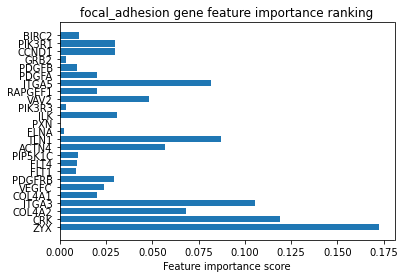

In [167]:
plt.barh(feature_names, model.feature_importances_)
plt.xlabel("Feature importance score")
plt.title("focal_adhesion gene feature importance ranking")

In [168]:

feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

ZYX        1.722163e-01
CRK        1.188731e-01
ITGA3      1.056054e-01
TLN1       8.705433e-02
ITGA5      8.154611e-02
COL4A2     6.810224e-02
ACTN4      5.676415e-02
VAV2       4.809035e-02
ILK        3.077384e-02
PIK3R1     2.981570e-02
CCND1      2.965552e-02
PDGFRB     2.913909e-02
VEGFC      2.411480e-02
RAPGEF1    2.040961e-02
COL4A1     2.024992e-02
PDGFA      2.000000e-02
BIRC2      1.069188e-02
PIP5K1C    1.000000e-02
PDGFB      9.610390e-03
FLT4       9.343146e-03
FLT1       8.974359e-03
PIK3R3     3.358327e-03
GRB2       3.260685e-03
FLNA       2.350768e-03
PXN        1.845371e-17
dtype: float64

Text(0.5, 0, 'Feature importance score')

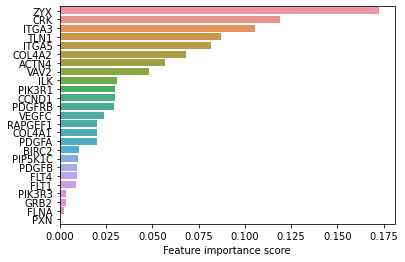

In [169]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel("Feature importance score")

In [170]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [171]:
# class balanced random forest for imbalanced classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [172]:
y_pred = model.predict(X_test)

In [173]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[27]]


In [174]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27

